In [1]:
import pandas as pd
import numpy as np


In [2]:
data = {

    "Restaurant": [
        "Miller & Carter",
        "Farina 2.0",
        "imli",
        "Three Fishes",
        "Le-Roti Rotisserie",
        "Apricot Lytham",
        "Zekos Pizza",
        "Jai Lounge"
    ],

    "Location": [
        "Lytham St Annes",
        "Lytham St Annes",
        "Lytham St Annes",
        "Lytham St Annes",
        "Lytham St Annes",
        "Lytham St Annes",
        "Lytham St Annes",
        "Lytham St Annes"
    ],

    "Menu_Type": [
        "Steakhouse Premium",
        "Italian Casual Dining",
        "Indian Restaurant",
        "Fish & Chips Takeaway",
        "Rotisserie Takeaway",
        "Brunch Cafe",
        "Pizza Takeaway",
        "Coffee & Kitchen"
    ],

    "Combo_Deal_Price": [
        25,
        18,
        15,
        10,
        12,
        14,
        13,
        11
    ],

    "Customers_Per_Day": [
        120,
        90,
        150,
        200,
        130,
        110,
        180,
        140
    ],

    "Customer_Type": [
        "High income professionals",
        "Middle class families",
        "Mixed demographics",
        "Working class",
        "Budget customers",
        "Young professionals",
        "Students and families",
        "Mixed demographics"
    ]
}

df = pd.DataFrame(data)

df


,Restaurant,Location,Menu_Type,Combo_Deal_Price,Customers_Per_Day,Customer_Type
0,Miller & Carter,Lytham St Annes,Steakhouse Premium,25,120,High income professionals
1,Farina 2.0,Lytham St Annes,Italian Casual Dining,18,90,Middle class families
2,imli,Lytham St Annes,Indian Restaurant,15,150,Mixed demographics
3,Three Fishes,Lytham St Annes,Fish & Chips Takeaway,10,200,Working class
4,Le-Roti Rotisserie,Lytham St Annes,Rotisserie Takeaway,12,130,Budget customers
5,Apricot Lytham,Lytham St Annes,Brunch Cafe,14,110,Young professionals
6,Zekos Pizza,Lytham St Annes,Pizza Takeaway,13,180,Students and families
7,Jai Lounge,Lytham St Annes,Coffee & Kitchen,11,140,Mixed demographics


In [3]:
df["Daily_Revenue"] = df["Combo_Deal_Price"] * df["Customers_Per_Day"]

df["Weekly_Revenue"] = df["Daily_Revenue"] * 7

df["Yearly_Revenue"] = df["Daily_Revenue"] * 365

df


,Restaurant,Location,Menu_Type,Combo_Deal_Price,Customers_Per_Day,Customer_Type,Daily_Revenue,Weekly_Revenue,Yearly_Revenue
0,Miller & Carter,Lytham St Annes,Steakhouse Premium,25,120,High income professionals,3000,21000,1095000
1,Farina 2.0,Lytham St Annes,Italian Casual Dining,18,90,Middle class families,1620,11340,591300
2,imli,Lytham St Annes,Indian Restaurant,15,150,Mixed demographics,2250,15750,821250
3,Three Fishes,Lytham St Annes,Fish & Chips Takeaway,10,200,Working class,2000,14000,730000
4,Le-Roti Rotisserie,Lytham St Annes,Rotisserie Takeaway,12,130,Budget customers,1560,10920,569400
5,Apricot Lytham,Lytham St Annes,Brunch Cafe,14,110,Young professionals,1540,10780,562100
6,Zekos Pizza,Lytham St Annes,Pizza Takeaway,13,180,Students and families,2340,16380,854100
7,Jai Lounge,Lytham St Annes,Coffee & Kitchen,11,140,Mixed demographics,1540,10780,562100


In [4]:
profit_margin = 0.12

df["Weekly_Profit"] = df["Weekly_Revenue"] * profit_margin

df["Yearly_Profit"] = df["Yearly_Revenue"] * profit_margin

df


,Restaurant,Location,Menu_Type,Combo_Deal_Price,Customers_Per_Day,Customer_Type,Daily_Revenue,Weekly_Revenue,Yearly_Revenue,Weekly_Profit,Yearly_Profit
0,Miller & Carter,Lytham St Annes,Steakhouse Premium,25,120,High income professionals,3000,21000,1095000,2520.0,131400.0
1,Farina 2.0,Lytham St Annes,Italian Casual Dining,18,90,Middle class families,1620,11340,591300,1360.8,70956.0
2,imli,Lytham St Annes,Indian Restaurant,15,150,Mixed demographics,2250,15750,821250,1890.0,98550.0
3,Three Fishes,Lytham St Annes,Fish & Chips Takeaway,10,200,Working class,2000,14000,730000,1680.0,87600.0
4,Le-Roti Rotisserie,Lytham St Annes,Rotisserie Takeaway,12,130,Budget customers,1560,10920,569400,1310.4,68328.0
5,Apricot Lytham,Lytham St Annes,Brunch Cafe,14,110,Young professionals,1540,10780,562100,1293.6,67452.0
6,Zekos Pizza,Lytham St Annes,Pizza Takeaway,13,180,Students and families,2340,16380,854100,1965.6,102492.0
7,Jai Lounge,Lytham St Annes,Coffee & Kitchen,11,140,Mixed demographics,1540,10780,562100,1293.6,67452.0


In [5]:
def combo_logic(price, customers):

    if price >= 20:
        category = "Premium combo"
        demand = customers * 0.8

    elif price >= 12:
        category = "Standard combo"
        demand = customers

    else:
        category = "Budget combo"
        demand = customers * 1.2

    return category, demand


In [6]:
df["Combo_Category"], df["Adjusted_Demand"] = zip(
    *df.apply(lambda row: combo_logic(row["Combo_Deal_Price"], row["Customers_Per_Day"]), axis=1)
)

df


,Restaurant,Location,Menu_Type,Combo_Deal_Price,Customers_Per_Day,Customer_Type,Daily_Revenue,Weekly_Revenue,Yearly_Revenue,Weekly_Profit,Yearly_Profit,Combo_Category,Adjusted_Demand
0,Miller & Carter,Lytham St Annes,Steakhouse Premium,25,120,High income professionals,3000,21000,1095000,2520.0,131400.0,Premium combo,96.0
1,Farina 2.0,Lytham St Annes,Italian Casual Dining,18,90,Middle class families,1620,11340,591300,1360.8,70956.0,Standard combo,90.0
2,imli,Lytham St Annes,Indian Restaurant,15,150,Mixed demographics,2250,15750,821250,1890.0,98550.0,Standard combo,150.0
3,Three Fishes,Lytham St Annes,Fish & Chips Takeaway,10,200,Working class,2000,14000,730000,1680.0,87600.0,Budget combo,240.0
4,Le-Roti Rotisserie,Lytham St Annes,Rotisserie Takeaway,12,130,Budget customers,1560,10920,569400,1310.4,68328.0,Standard combo,130.0
5,Apricot Lytham,Lytham St Annes,Brunch Cafe,14,110,Young professionals,1540,10780,562100,1293.6,67452.0,Standard combo,110.0
6,Zekos Pizza,Lytham St Annes,Pizza Takeaway,13,180,Students and families,2340,16380,854100,1965.6,102492.0,Standard combo,180.0
7,Jai Lounge,Lytham St Annes,Coffee & Kitchen,11,140,Mixed demographics,1540,10780,562100,1293.6,67452.0,Budget combo,168.0


In [7]:
uk_df = pd.concat([df]*15000, ignore_index=True)

uk_df["Restaurant_ID"] = np.arange(len(uk_df))

uk_df.head()


,Restaurant,Location,Menu_Type,Combo_Deal_Price,Customers_Per_Day,Customer_Type,Daily_Revenue,Weekly_Revenue,Yearly_Revenue,Weekly_Profit,Yearly_Profit,Combo_Category,Adjusted_Demand,Restaurant_ID
0,Miller & Carter,Lytham St Annes,Steakhouse Premium,25,120,High income professionals,3000,21000,1095000,2520.0,131400.0,Premium combo,96.0,0
1,Farina 2.0,Lytham St Annes,Italian Casual Dining,18,90,Middle class families,1620,11340,591300,1360.8,70956.0,Standard combo,90.0,1
2,imli,Lytham St Annes,Indian Restaurant,15,150,Mixed demographics,2250,15750,821250,1890.0,98550.0,Standard combo,150.0,2
3,Three Fishes,Lytham St Annes,Fish & Chips Takeaway,10,200,Working class,2000,14000,730000,1680.0,87600.0,Budget combo,240.0,3
4,Le-Roti Rotisserie,Lytham St Annes,Rotisserie Takeaway,12,130,Budget customers,1560,10920,569400,1310.4,68328.0,Standard combo,130.0,4


In [8]:
total_weekly_profit = uk_df["Weekly_Profit"].sum()

total_yearly_profit = uk_df["Yearly_Profit"].sum()

print("UK Weekly Profit:", total_weekly_profit)

print("UK Yearly Profit:", total_yearly_profit)


UK Weekly Profit: 199710000.0
UK Yearly Profit: 10413450000.0


In [9]:
def customer_demographic(price):

    if price > 20:
        return "High income"

    elif price > 12:
        return "Middle income"

    else:
        return "Low income"


In [10]:
df["Income_Group"] = df["Combo_Deal_Price"].apply(customer_demographic)

df


,Restaurant,Location,Menu_Type,Combo_Deal_Price,Customers_Per_Day,Customer_Type,Daily_Revenue,Weekly_Revenue,Yearly_Revenue,Weekly_Profit,Yearly_Profit,Combo_Category,Adjusted_Demand,Income_Group
0,Miller & Carter,Lytham St Annes,Steakhouse Premium,25,120,High income professionals,3000,21000,1095000,2520.0,131400.0,Premium combo,96.0,High income
1,Farina 2.0,Lytham St Annes,Italian Casual Dining,18,90,Middle class families,1620,11340,591300,1360.8,70956.0,Standard combo,90.0,Middle income
2,imli,Lytham St Annes,Indian Restaurant,15,150,Mixed demographics,2250,15750,821250,1890.0,98550.0,Standard combo,150.0,Middle income
3,Three Fishes,Lytham St Annes,Fish & Chips Takeaway,10,200,Working class,2000,14000,730000,1680.0,87600.0,Budget combo,240.0,Low income
4,Le-Roti Rotisserie,Lytham St Annes,Rotisserie Takeaway,12,130,Budget customers,1560,10920,569400,1310.4,68328.0,Standard combo,130.0,Low income
5,Apricot Lytham,Lytham St Annes,Brunch Cafe,14,110,Young professionals,1540,10780,562100,1293.6,67452.0,Standard combo,110.0,Middle income
6,Zekos Pizza,Lytham St Annes,Pizza Takeaway,13,180,Students and families,2340,16380,854100,1965.6,102492.0,Standard combo,180.0,Middle income
7,Jai Lounge,Lytham St Annes,Coffee & Kitchen,11,140,Mixed demographics,1540,10780,562100,1293.6,67452.0,Budget combo,168.0,Low income


In [11]:
df.to_csv("lytham_restaurants_dataset.csv", index=False)

uk_df.to_csv("uk_restaurants_dataset.csv", index=False)


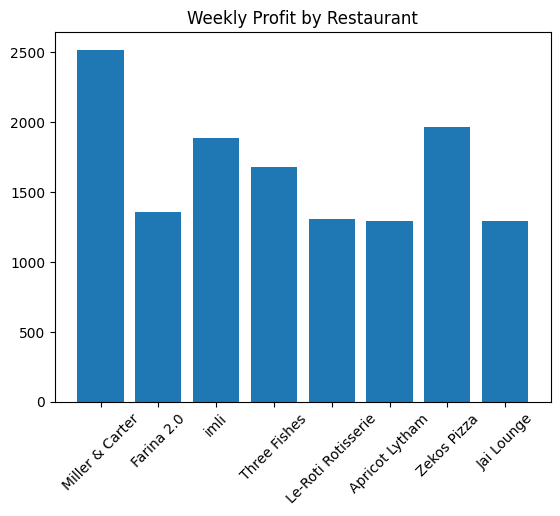

In [12]:
import matplotlib.pyplot as plt

plt.bar(df["Restaurant"], df["Weekly_Profit"])

plt.xticks(rotation=45)

plt.title("Weekly Profit by Restaurant")

plt.show()
